In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


import warnings
warnings.filterwarnings("ignore")
# Connect to my database

conn = psycopg2.connect(
    host="",
    port="",  
    database="",  
    user="",  
    password=""  
)

cursor = conn.cursor()

In [2]:
# Query to retrieve Oregon kicking stats along with weather, altitude, and distance
query = """
SELECT date, location, opponent, 
       fg_1_19, fg_20_29, fg_30_39, fg_40_49, fg_50_plus, longest_fg, fg_percentage, fg_made, xp_made, points_scored, temp_f, precipitation_in, windspeed_mph, altitude_m, distance_from
FROM Washington_Kicking_Stats;
"""

uw_kicking = pd.read_sql(query, conn)

# Display the first few rows of the data
uw_kicking.head()

,date,location,opponent,fg_1_19,fg_20_29,fg_30_39,fg_40_49,fg_50_plus,longest_fg,fg_percentage,fg_made,xp_made,points_scored,temp_f,precipitation_in,windspeed_mph,altitude_m,distance_from
0,2014-11-15,@,Arizona,0,0,2,0,0,39,100.0,2,2,8,62.3,0.0,9.7,728.0,1219.94
1,2023-09-02,H,Boise State,0,0,0,0,0,0,0.0,0,8,8,65.7,0.0,5.8,53.0,0.00
2,2023-09-09,H,Tulsa,0,0,0,0,0,0,0.0,0,5,5,67.7,0.0,10.2,53.0,0.00
3,2023-09-16,@,Michigan State,0,2,0,0,0,29,100.0,2,5,11,61.4,0.0,8.9,262.0,1859.35
4,2023-09-23,H,California,0,0,0,1,0,41,100.0,1,7,10,56.3,0.0,17.1,53.0,0.00


In [3]:
uw_kicking['Temp_Range'] = pd.cut(
    uw_kicking['temp_f'], 
    bins=[-np.inf, 40, 50, 60, 70, 80, np.inf], 
    labels=['<40', '40-50', '50-60', '60-70', '70-80', '80+']
)


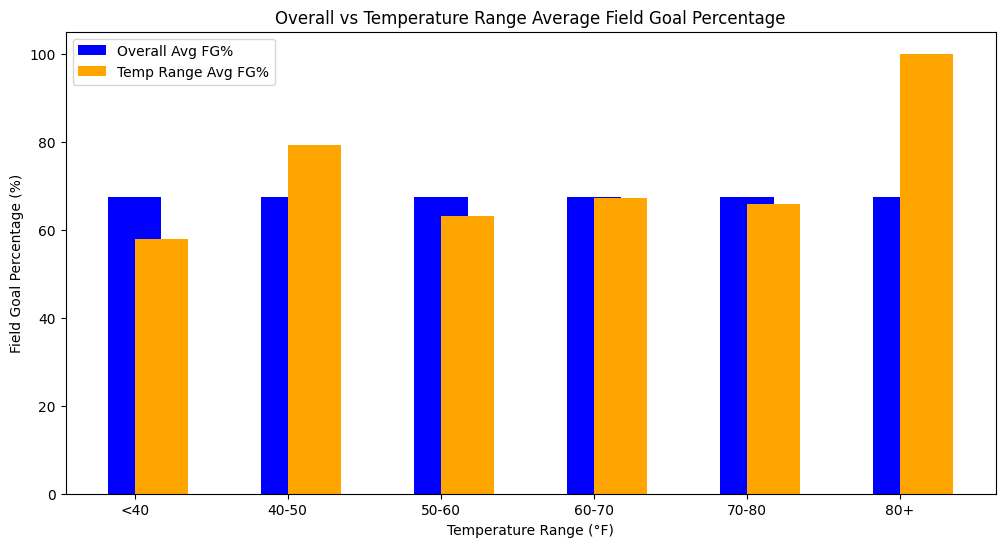

In [4]:
# overall average FG%
overall_avg_fg = uw_kicking['fg_percentage'].mean()

# Calculate average FG% for each temperature range
temp_avg_fg = uw_kicking.groupby('Temp_Range')['fg_percentage'].mean().reindex(['<40', '40-50', '50-60', '60-70', '70-80', '80+'])

# Prepare data for plotting
avg_data = pd.DataFrame({
    'Temp_Range': temp_avg_fg.index,
    'Overall_Avg_FG%': [overall_avg_fg] * len(temp_avg_fg),
    'Temp_Range_Avg_FG%': temp_avg_fg.values
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(avg_data['Temp_Range'], avg_data['Overall_Avg_FG%'], width=bar_width, label='Overall Avg FG%', color='blue', align='center')
plt.bar(avg_data['Temp_Range'], avg_data['Temp_Range_Avg_FG%'], width=bar_width, label='Temp Range Avg FG%', color='orange', align='edge')

plt.xlabel('Temperature Range (°F)')
plt.ylabel('Field Goal Percentage (%)')
plt.title('Overall vs Temperature Range Average Field Goal Percentage')
plt.legend()

plt.show()
